<a href="https://www.kaggle.com/code/ayushs9020/making-my-own-transformer?scriptVersionId=138762526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00B9F7; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00B9F7">Transformers</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

<div style="border-radius:10px; border:#00B9F7 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = 'https://media.tenor.com/LStfD5yI5SsAAAAC/transformers-darkofthemoon.gif'>
    
## So what the hell is this **`Transformers`** $...?$
    
Yes we have been asking this question from an whole eternity. When we search on $Google$/or any other search engine, we find the same answer
```
A transformer is a type of neural network architecture that is blah blah blah blah
```
But what it actually is and why do we even need this 
    
<img src = 'https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png' width = 400>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#8E24AA; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #8E24AA">1 | Self Attention 👀</p>

In [2]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<IMG SRC = 'https://media.tenor.com/AleRU5nZSasAAAAC/attention-notice-me.gif' WIDTH = 400>
    
Society says that the best way to understand `Transformer Architechture`, is to first understand `Self-Attention Mechanism`. 

I dont know who are the actual people in society, and why do these people do not show up individually, why they cover up themselves with the word `Society`

**LEAVE IT !!!**

Lets assume we have this sentence `Radhe Krishn`

Lets assume we pass this to an `Embedding Layer` to get `Embeddings`. These `Embeddings` will be `Random`, but lets dive it in 

In [3]:
Embedding_Layer = nn.Embedding(2 , 12)
Embedding_Layer

Embedding(2, 12)

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

As our corpus only consists of $2$ distinct words, we can label them as `[0,1]`

Passing this to an Embedding Layer, 

In [4]:
inputs = Embedding_Layer(torch.tensor([0 , 1] , dtype = torch.long))
inputs , inputs.shape

(tensor([[ 0.7209,  0.4126, -0.4243, -2.6927, -0.9098, -1.1106,  0.0666, -0.3723,
           0.2370,  0.5469,  0.4355, -1.3716],
         [ 0.2793, -1.5726,  0.0105,  0.5368, -0.1770, -0.8131,  0.2853, -0.5327,
          -0.2775, -0.7644,  2.3227, -0.2532]], grad_fn=<EmbeddingBackward0>),
 torch.Size([2, 12]))

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Suppose we could be able to know, how much these words affect each other 

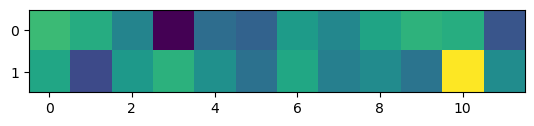

In [5]:
plt.imshow(inputs.detach().numpy())

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

By human instincts we know that these $2$ words highle corresponds to each other

But how can we make a machine understand this 

So how can we do this$...?$

The whole concept, where `distinct words` of a `chunk of text` show some `focus`/`effect`/`attention` to `other words` is called `Self Attention`

We do this by using $3$ $Major$ $Neural$ $Networks$. For making things more complicated we give them names
* $Query$ - What I am Looking for
* $Key$ - What I can offer
* $Value$ - What I actually offer(I was bluffing before)

We will think of these as $3$ $Linear$ $Layers$

We know that at the starting $Linear$ $Layers$ are just bunch of random numbers hanging out together like this
    
<img src = 'https://i.scdn.co/image/ab67616d0000b2732a517799858bf32fe736c2ca' width = 300>

So lets just intialize some random $Linear$ $Layers$

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

As we have $2$ characters, so our `sequence_len == 2`/`vocab_size == 2`

In [6]:
sequence_len , vocab_size = 2 , 2
embed_layer = nn.Embedding(sequence_len , vocab_size)

inputs = embed_layer(torch.tensor([0 , 1]))

In [7]:
queries = torch.rand((sequence_len , vocab_size) , dtype = torch.float32)
keys = torch.rand((sequence_len , vocab_size) , dtype = torch.float32)
values = torch.rand((sequence_len , vocab_size) , dtype = torch.float32)

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

So what we do is we simply multiply `queries` and `keys`

In [8]:
queries * keys

tensor([[0.0895, 0.1060],
        [0.1281, 0.4218]])

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

So why we did this$...?$

Think it like this. We have to complete the sentence `He became ___ Universe`. Now we need to fill in the blank. Lets assume we have the information of future tokens. A model when searches for information in the back-tokens, it needs `He` to be highlighted. That what `queries * keys` do. When the 
* Queries - What you want
* Key - What I can offer

When these $2$(Question and answer) meet they show `high iffinity`. Thats why we multiply both of them

But how can we get the index with `highest iffinity` $...?$

One way is to do a `Softmax` on all of these

In [9]:
softmax = nn.Softmax()

softmax(queries * keys)

tensor([[0.4959, 0.5041],
        [0.4271, 0.5729]])

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

But these values are very huge and thus can make big variations in the model, thus we will divide them with something

In [10]:
weights = softmax((queries * keys) / keys.shape[-1])

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now this is kind of good 

We then multiply this with our `values` to get outputs

In [11]:
torch.matmul(weights , values)

tensor([[0.6588, 0.5159],
        [0.6565, 0.5085]])

<div style="border-radius:10px; border:#8E24AA solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

And these are our final output from `Self-Attention`.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#F2C464; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F2C464">2 | Multi Head Attention 🧠‍🧠‍🧠</p>

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
What we did is a implimaentation of `Single Head`. We use multiple heads to gather multiple information of the corpus

So how do we handle `Multiple Heads`$...?$

Assume we have the same sentence but this time we have increased our Output of Embedding Layer

In [12]:
Embedding_Layer = nn.Embedding(2 , 10)

inputs = Embedding_Layer(torch.tensor([0 , 1]))
inputs

tensor([[ 1.3944,  0.4526, -0.5583, -0.3978, -0.7806,  1.1587, -0.0141, -0.4937,
         -0.4388,  0.5218],
        [ 0.5472, -1.4818,  1.2683,  1.7026,  0.3606, -0.2355,  0.7674, -0.7715,
          0.3193,  0.9241]], grad_fn=<EmbeddingBackward0>)

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets assume we are making $5$ Heads. 

What we do is we break this matrix into $5$ parts and then seperately work on them. Lets assume the indices of our matrix is like
```
[(0 , 0) , (0 , 1) , (0 , 2) , (0 , 3) , (0 , 4) , (0 , 5) , (0 , 6) , (0 , 7) , (0 , 8) , (0 , 9) , 
(1 , 0) , (1 , 1) , (1 , 2) , (1 , 3) , (1 , 4) , (1 , 5) , (1 , 6) , (1 , 7) , (1 . 8) , (1 , 9)]
```
By breaking it in $5$ parts 
```
[(0 , 0) , (0 , 1) , 
(1 , 0) , (1 , 1)]

[(0 , 2) , (0 , 3) ,
(1 , 2) , (1 , 3)]

[(0 , 4) , (0 , 5) ,
(1 , 4) , (1 , 5)]

[(0 , 6) , (0 , 7) ,
(1 , 6) , (1 , 7)]

[(0 , 8) , (0 , 9) , 
(1 . 8) , (1 , 9)]
```

So how do we do this$...?$

One way is to make $5$ different `Linear Layers` and compute them, which can be expensive

One way is somehow we can break this thing up, pass into Neural Networks and then re-concatenate them. This can be computationaly expensive 

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

First we will `reshape` this array

In [13]:
inputs = torch.reshape(inputs, (1, 2 , 5 , 2))
inputs

tensor([[[[ 1.3944,  0.4526],
          [-0.5583, -0.3978],
          [-0.7806,  1.1587],
          [-0.0141, -0.4937],
          [-0.4388,  0.5218]],

         [[ 0.5472, -1.4818],
          [ 1.2683,  1.7026],
          [ 0.3606, -0.2355],
          [ 0.7674, -0.7715],
          [ 0.3193,  0.9241]]]], grad_fn=<ReshapeAliasBackward0>)

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we need to `permute` this 

In [14]:
inputs = inputs.permute(2 , 1 , 0 , 3)
inputs

tensor([[[[ 1.3944,  0.4526]],

         [[ 0.5472, -1.4818]]],


        [[[-0.5583, -0.3978]],

         [[ 1.2683,  1.7026]]],


        [[[-0.7806,  1.1587]],

         [[ 0.3606, -0.2355]]],


        [[[-0.0141, -0.4937]],

         [[ 0.7674, -0.7715]]],


        [[[-0.4388,  0.5218]],

         [[ 0.3193,  0.9241]]]], grad_fn=<PermuteBackward0>)

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

And this is the same as we wanted

<div style="border-radius:10px; border:#F2C464 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Lets now start connecting things up 

<img src = 'https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-08_at_12.17.05_AM_st5S0XV.png' width = 400>

* We first intialize $3$ $Linear$ $Layers$ 
* * $Query$ - What I am looking for
* * $Key$ - What I can offer
* * $Values$ - What I actually offer
* We pass the $Query$ and $Keys$ into a dot product
* We then calculate the softmax of the product
* Then we dot product with $Values$
* Then we concatenate 
* (We have left the Linear Layers for this time)

We do the same thing for a number of heads

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF69B4; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF69B4">3 | Mutli Head Self Attention Class 🌎</p>

<div style="border-radius:10px; border:#FF69B4 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<IMG SRC = 'https://cleanmemes.files.wordpress.com/2014/10/35multiheaddog1.jpg?w=640' WIDTH = 400>
    
Now lets just make a simple class for this
    
A really great explanantion to the code by **[Hugging Chat](https://huggingface.co/chat/)**

### __init__
```
def __init__(self , vocab_size , num_heads):

    super(MultiHeadSelfAttention , self).__init__()

    self.num_heads = num_heads
    self.vocab_size = vocab_size

    self.queries = nn.Linear(self.vocab_size , self.vocab_size)
    self.keys = nn.Linear(self.vocab_size , self.vocab_size)
    self.values = nn.Linear(self.vocab_size , self.vocab_size)

    self.softmax = torch.nn.Softmax()
```

The `Constructor` takes two arguments
* $Vocablary$ $Size$ `vocab_size` - Size of the Vocablury
* $Number$ $of$ $Heads$ `num_heads`

It `initializes` the `instance variables` `num_heads`/`vocab_size`, and $3$ $Linear$ $Layers$ - `queries`/`keys`/`values`. The linear layers have a `single hidden layer` with a `dimensionality` of `vocab_size`.

### Split Heads
```
def split_heads(self , gate):

#         batch_size = gate.shape[0]

    split_gates = torch.reshape(gate, (1 , 
                                    self.num_heads , 
                                    int(self.vocab_size / self.num_heads) , 
                                    self.num_heads)).permute(2 , 1 , 0 , 3)

    return split_gates
```

This method takes a `gate` `(a tensor of shape (batch_size, vocab_size))` and `splits` it into `multiple heads`, each with a `size` of `(batch_size, vocab_size // num_heads)`. It does this by `reshaping` the gate into a $4D$ `tensor`, `permuting the dimensions`, and then `splitting` it along the `second dimension`.

### Forward
```
def forward(self , key , query , value , mask = None):

    query_output = self.queries(query)
    key_output = self.keys(key)
    value_output = self.values(value)

    query_output = self.split_heads(query_output)
    key_output = self.split_heads(key_output)
    value_output = self.split_heads(value_output)

    attention = (query_output * key_output) / (key_output.shape[-1] ** (1/2)) 

    if mask : attention = tf.where(mask == 0 , float('-inf') , attention)

    weights = self.softmax(attention)
    weights = torch.reshape(weights , (weights.shape[2] , int(self.vocab_size / self.num_heads) , 
                                       self.num_heads , self.num_heads))
    value_output = torch.reshape(value_output , (value_output.shape[2] , int(self.vocab_size / self.num_heads) , 
                                                 self.num_heads , self.num_heads))
    output = torch.matmul(weights , value_output)

    output = torch.reshape(output , (self.num_heads , self.vocab_size))

    return output , weights
```

This `method` `computes` the `attention scores` and `outputs` the final output. It takes four arguments - `key`/`query`/`value`/`mask` (an optional binary mask indicating which elements should be ignored).
* `Pass` the `query`/`key`/`value` tensors through their `corresponding linear layers` to get the `query`/`key`/`value` `embeddings`.
* `Split` the `query`/`key` `embeddings` into `multiple heads` using the `split_heads method`.
* `Compute` the `attention` scores by taking the `dot product` of the `query`/`key` `embeddings` and `dividing` the result by the `square root` of the `key embedding's dimensionality`.
* If a `mask` is `provided`, `zero` out the `attention scores` for the `masked elements`.
* `Apply` a `Softmax function` to the `attention scores` to get the weights.
* `Compute` the `output` by taking the `weighted sum` of the `value embeddings` using the weights computed earlier.
* `Reshape` the `output tensor` to have the `original vocabulary size`.

In [15]:
class MultiHeadSelfAttention(nn.Module):
    
    def __init__(self , vocab_size , num_heads):
        
        super(MultiHeadSelfAttention , self).__init__()
    
        self.num_heads = num_heads
        self.vocab_size = vocab_size
        
        self.queries = nn.Linear(self.vocab_size , self.vocab_size)
        self.keys = nn.Linear(self.vocab_size , self.vocab_size)
        self.values = nn.Linear(self.vocab_size , self.vocab_size)
        
        self.softmax = torch.nn.Softmax()
        
    def split_heads(self , gate):
        
#         batch_size = gate.shape[0]
        
        split_gates = torch.reshape(gate, (1 , # -----> batch_size 
                                        self.num_heads , 
                                        int(self.vocab_size / self.num_heads) , 
                                        self.num_heads)).permute(2 , 1 , 0 , 3)
        
        return split_gates
    
    def forward(self , key , query , value , mask = None):
        
        query_output = self.queries(query)
        key_output = self.keys(key)
        value_output = self.values(value)

        query_output = self.split_heads(query_output)
        key_output = self.split_heads(key_output)
        value_output = self.split_heads(value_output)

        attention = (query_output * key_output) / (key_output.shape[-1] ** (1/2)) 
        
        if mask : attention = tf.where(mask == 0 , float('-inf') , attention)

        weights = self.softmax(attention)
        weights = torch.reshape(weights , (weights.shape[2] , int(self.vocab_size / self.num_heads) , 
                                           self.num_heads , self.num_heads))
        value_output = torch.reshape(value_output , (value_output.shape[2] , int(self.vocab_size / self.num_heads) , 
                                                     self.num_heads , self.num_heads))
        output = torch.matmul(weights , value_output)
        
        output = torch.reshape(output , (self.num_heads , self.vocab_size))

        return output , weights

<div style="border-radius:10px; border:#FF69B4 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

If we pass a sample input like this 

In [16]:
mhsa = MultiHeadSelfAttention(vocab_size = 10 , num_heads = 2)
inputs = Embedding_Layer(torch.tensor([0 , 1]))
mhsa(inputs , inputs , inputs , None)

(tensor([[ 0.4862,  0.1052,  0.4948,  0.1071, -0.4120, -0.3251, -0.4405, -0.3091,
           0.2622,  0.4089],
         [ 0.1556,  0.3888,  0.4309, -0.2600,  0.2488, -0.1046,  0.5554, -0.5310,
           0.7257, -0.6390]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[[[0.4912, 0.4673],
           [0.5088, 0.5327]],
 
          [[0.5360, 0.4771],
           [0.4640, 0.5229]],
 
          [[0.4938, 0.6754],
           [0.5062, 0.3246]],
 
          [[0.7153, 0.6164],
           [0.2847, 0.3836]],
 
          [[0.4096, 0.4856],
           [0.5904, 0.5144]]]], grad_fn=<ReshapeAliasBackward0>))

<div style="border-radius:10px; border:#FF69B4 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

What we just made is the small part in this diagram

$Multi$ $Head$ $Self$ $Attention$ (Orange Part )

<img src = 'https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png' width = 300>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">4 | Encoder Block</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

### __init__
```
def __init__(self , vocab_size , num_heads):

    super(Encoder , self).__init__()

    self.vocab_size = vocab_size
    self.num_heads = num_heads

    self.mhsa = MultiHeadSelfAttention(self.vocab_size , self.num_heads)

    self.layer_norm_1 = nn.LayerNorm(self.vocab_size)
    self.layer_norm_2 = nn.LayerNorm(self.vocab_size)

    self.dropout_1 = nn.Dropout(0.05)
    self.dropout_2 = nn.Dropout(0.05)

    self.linear_1 = nn.Linear(self.vocab_size , self.vocab_size)
```

The `constructor` function takes $2$ `arguments`
* $Vocabluray$ $Size$ `vocab_size` - size of the vocablury
* $Num$ $Heads$ `num_heads` - number of heads

It then creates the following layers
* $Multi$ $Heads$ $Self$ $Attention$ `mhsa` layer with the `vocab_size` and `num_heads` parameters. 
* $Layer$ $Normalization$ `layer_norm_1`/`layer_norm_2`  with the same dimension as the `vocab_size`. 
* $Droput$ `dropout_1`/`dropout_2` with a `dropout rate` of $0.05$. 
* $Linaer$ `linear_1` with an `input dimension` equal to the `vocab_size` and an `output dimension` also equal to the `vocab_size`

### Forward 
```
def forward(self , inps):

    attention , weights = self.mhsa(inps , inps , inps , mask = None)

    attention = self.dropout_1(attention)
    attention = self.layer_norm_1(inps + attention)

    linear_attention = self.linear_1(attention)

    linear_attention = self.layer_norm_2(linear_attention)
    attention = self.dropout_2(linear_attention + attention)

    return attention , weights
```
The `forward function` takes an `input tensor inps` and passes it through the `MultiHeadSelfAttention layer`=>, $2$ `Layer Normalization layers` => $2$ `Dropout layers` => `Linear layer`

In [17]:
class Encoder(nn.Module):
    
    def __init__(self , vocab_size , num_heads):
        
        super(Encoder , self).__init__()
        
        self.vocab_size = vocab_size
        self.num_heads = num_heads
        
        self.mhsa = MultiHeadSelfAttention(self.vocab_size , self.num_heads)
        
        self.layer_norm_1 = nn.LayerNorm(self.vocab_size)
        self.layer_norm_2 = nn.LayerNorm(self.vocab_size)
        
        self.dropout_1 = nn.Dropout(0.05)
        self.dropout_2 = nn.Dropout(0.05)
        
        self.linear_1 = nn.Linear(self.vocab_size , self.vocab_size)
        
    def forward(self , inps):
        
        attention , weights = self.mhsa(inps , inps , inps , mask = None)

        attention = self.dropout_1(attention)
        attention = self.layer_norm_1(inps + attention)
        
        linear_attention = self.linear_1(attention)
        
        linear_attention = self.layer_norm_2(linear_attention)
        attention = self.dropout_2(linear_attention + attention)
        
        return attention , weights 

In [18]:
Enc = Encoder(vocab_size = 10 , num_heads = 2)
Enc(inputs)

(tensor([[ 1.5637,  1.0619,  0.4790, -2.6777, -0.0883,  0.6342, -1.1792, -0.5177,
          -0.9047,  1.6289],
         [-0.7144, -3.1763,  0.5627,  2.7788,  0.2011, -2.0062,  0.0000, -2.5095,
           1.2002,  2.3786]], grad_fn=<MulBackward0>),
 tensor([[[[0.5262, 0.5035],
           [0.4738, 0.4965]],
 
          [[0.4614, 0.3551],
           [0.5386, 0.6449]],
 
          [[0.5475, 0.4952],
           [0.4525, 0.5048]],
 
          [[0.4697, 0.4036],
           [0.5303, 0.5964]],
 
          [[0.4279, 0.4949],
           [0.5721, 0.5051]]]], grad_fn=<ReshapeAliasBackward0>))

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

What we just did was this 

<img src = 'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/Transformer-neural-network-13.png' width = 400>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#E77200; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #E77200">5 | TO DO LIST 📑</p>

<div style="border-radius:10px; border:#E77200 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
* $TO$ $DO$ $1$ $:$ $MAKE$ $ENCODER$ $BLOCK$
* $TO$ $DO$ $2$ $:$ $MAKE$ $DECODER$ $BLOCK$
* $TO$ $DO$ $3$ $:$ $MAKE$ $TRANSFORER$ $BLOCK$
* $TO$ $DO$ $4$ $:$ $TRAIN$ $TRANSFORER$
* $TO$ $DO$ $5$ $:$ $DANCE$

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF9980; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF9980">6 | Ending 🎭</p>

<div style="border-radius:10px; border:#FF9980 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**
    
<img src = "https://i.imgflip.com/19aadg.jpg">
    
**PEACE OUT $!!!$**